In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("aggregated_statistics.json", 
          "r", 
          encoding="utf-8") as f:
    stats = json.load(f)

In [3]:
countries = list(stats.keys())
average_sentiments = [
    stats[c]["average_sentiment"] for c in countries
    ]
article_counts = [stats[c]["total_articles"] for c in countries]
theme_keys = list(
    next(iter(stats.values()))["theme_distribution"].keys()
    )
theme_distributions = {k: [] for k in theme_keys}

In [4]:
for c in countries:
    for theme in theme_keys:
        theme_distributions[theme].append(
            stats[c]["theme_distribution"].get(theme, 0.0)
            )

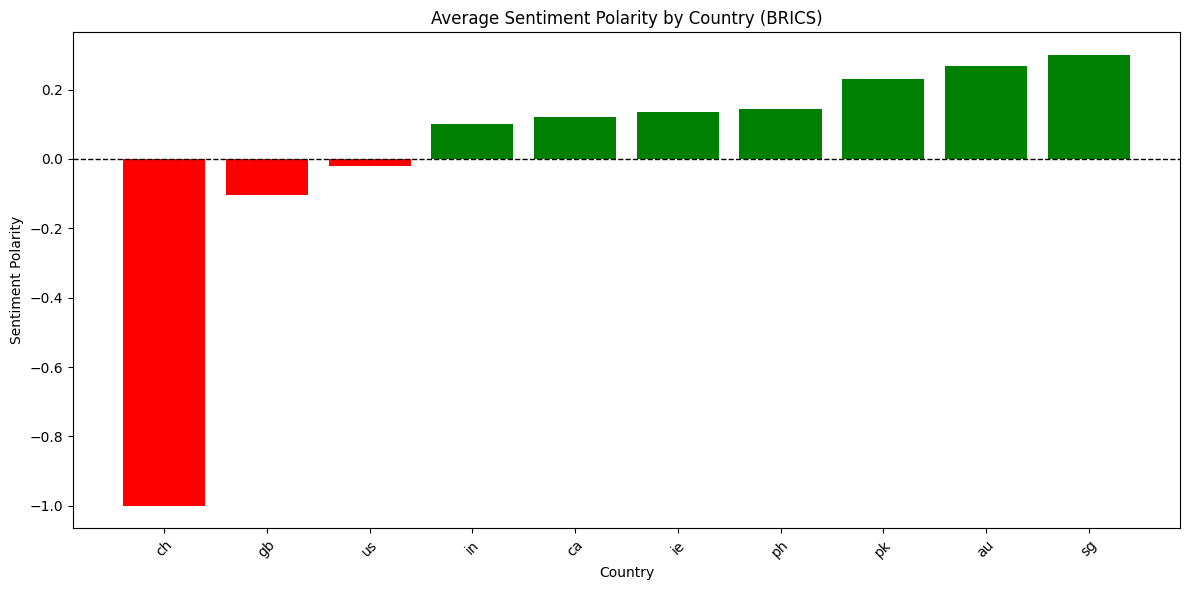

In [5]:
sorted_sent = sorted(zip(countries, average_sentiments), key=lambda x: x[1])
sorted_countries_sent, sorted_values_sent = zip(*sorted_sent)
colors = ["green" if v >= 0 else "red" for v in sorted_values_sent]

plt.figure(figsize=(12, 6))
plt.bar(sorted_countries_sent, sorted_values_sent, color=colors)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Average Sentiment Polarity by Country (BRICS)")
plt.xlabel("Country")
plt.ylabel("Sentiment Polarity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

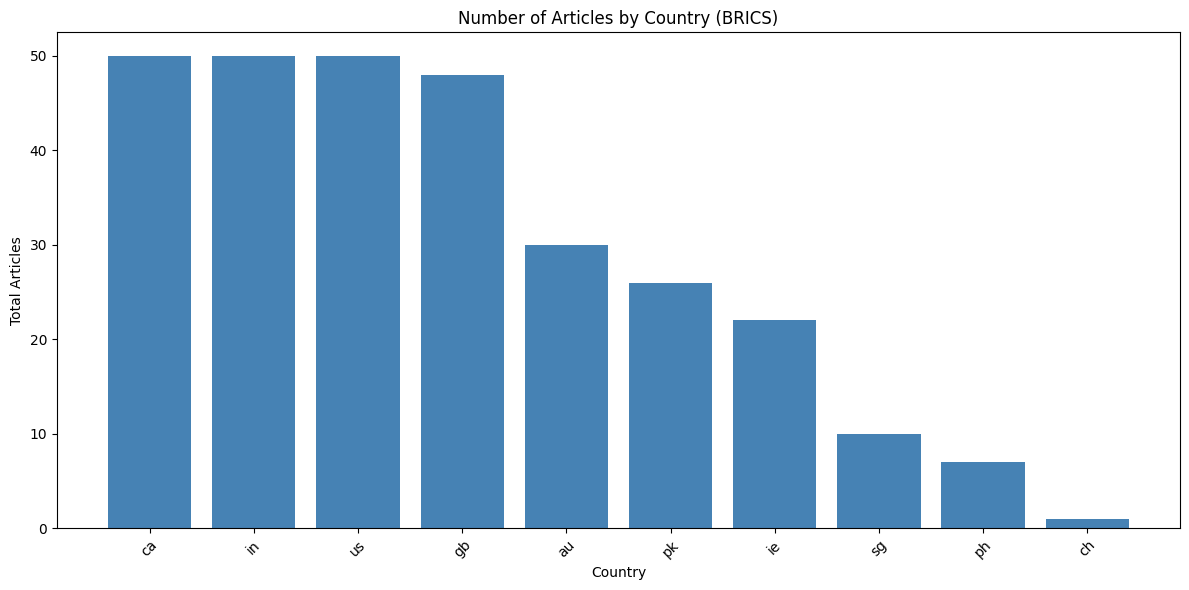

In [6]:
sorted_count = sorted(zip(countries, article_counts), key=lambda x: x[1], reverse=True)
sorted_countries_count, sorted_values_count = zip(*sorted_count)

plt.figure(figsize=(12, 6))
plt.bar(sorted_countries_count, sorted_values_count, color="steelblue")
plt.title("Number of Articles by Country (BRICS)")
plt.xlabel("Country")
plt.ylabel("Total Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

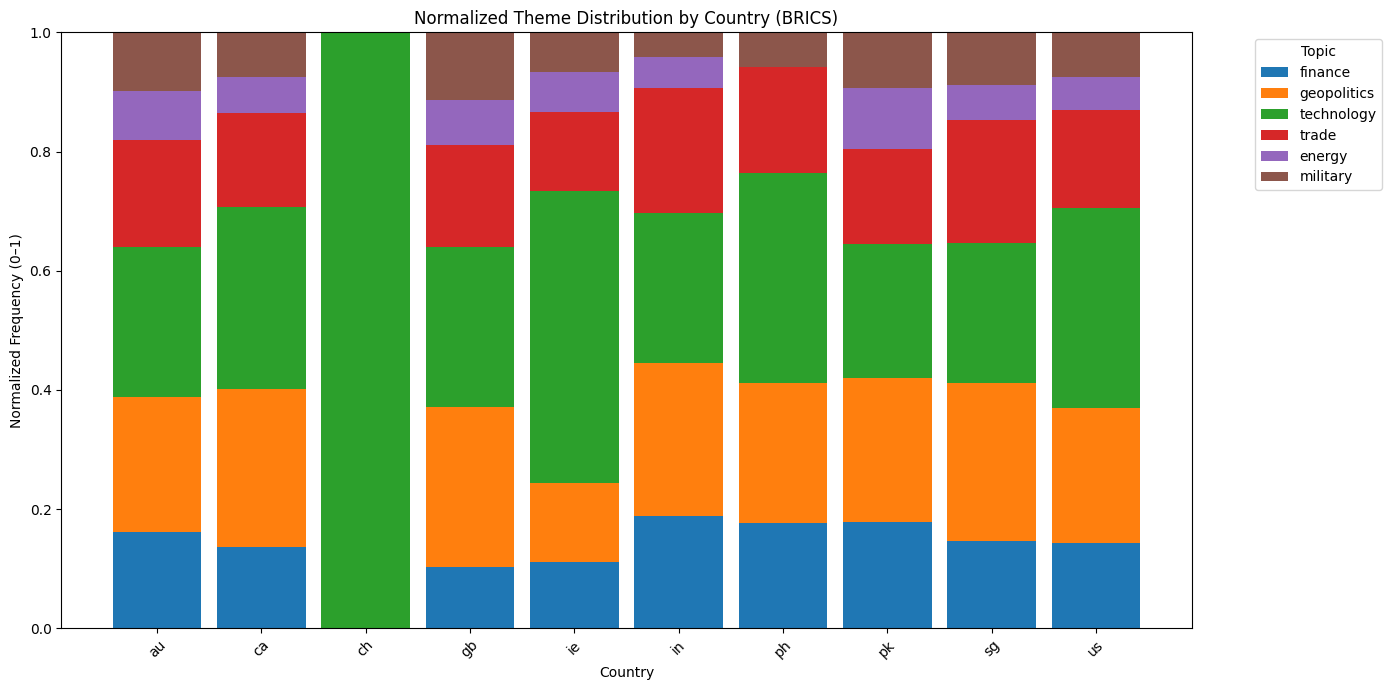

In [7]:
# 🔄 1. Преобразуем в матрицу размера [n_countries x n_topics]
raw_matrix = np.array([theme_distributions[theme] for theme in theme_keys]).T  # shape: (n_countries, n_topics)

# 🔄 2. Нормализация по строкам (по каждой стране)
row_sums = raw_matrix.sum(axis=1, keepdims=True)
# защитимся от деления на 0
row_sums[row_sums == 0] = 1
normalized_matrix = raw_matrix / row_sums  # сумма по строке = 1

# 🔄 3. Построим график
x = np.arange(len(countries))
bar_width = 0.85
bottom = np.zeros(len(countries))

plt.figure(figsize=(14, 7))

for i, theme in enumerate(theme_keys):
    values = normalized_matrix[:, i]
    plt.bar(x, values, bar_width, bottom=bottom, label=theme)
    bottom += values

plt.xticks(x, countries, rotation=45)
plt.ylabel("Normalized Frequency (0–1)")
plt.xlabel("Country")
plt.title("Normalized Theme Distribution by Country (BRICS)")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()